In [2]:
import numpy as np
import pandas as pd
import gc
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',200)

### application_train/test 파일 불러오기




In [4]:
app_train=pd.read_csv("/content/drive/MyDrive/application_train.csv")
app_test=pd.read_csv("/content/drive/MyDrive/application_test.csv")

In [6]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

#### TARGET 값 분포

In [9]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

#### app_train과 app_test를 합쳐서 한번에 데이터 preprocessiong 수행

In [24]:
apps=pd.concat([app_train,app_test])
apps.shape

(356255, 122)

In [12]:
#app_test의 TARGET값은 null로 표기됨
apps['TARGET'].value_counts()

0.0    282686
1.0     24825
Name: TARGET, dtype: int64

#### object feature들을 Label Encoding
* pandas의 factorize는 Label 인코딩된 Series와 unique한 category값을 반환한다.

In [14]:
#object feature들을 추출
object_columns=apps.dtypes[apps.dtypes=='object'].index.tolist()
object_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [25]:
for column in object_columns:
  apps[column]=pd.factorize(apps[column])[0]

In [26]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(66), int64(56)
memory usage: 334.3 MB


#### Null값 일괄 변환

In [28]:
apps.isnull().sum().head(100)

SK_ID_CURR                           0
TARGET                           48744
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         36
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     235241
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [29]:
#null값을 모두 -999로 변환
apps=apps.fillna(-999)

In [30]:
apps.isnull().sum().sum()

0

#### 학습 데이터와 테스트 데이터 다시 분리

In [37]:
app_train=apps[apps['TARGET']!=-999]
app_test=apps[apps['TARGET']==-999]
app_train.shape, app_test.shape

((307511, 122), (48744, 122))

In [38]:
app_test=app_test.drop('TARGET',axis=1)


In [36]:
app_test.shape

(48744, 121)

#### 학습 데이터를 검증 데이터로 분리하고 LGBM Classifier로 학습 수행

In [39]:
ftr_app=app_train.drop(['SK_ID_CURR','TARGET'],axis=1)
target_app=app_train['TARGET']

In [45]:
from sklearn.model_selection import train_test_split

train_x,valid_x,train_y,valid_y=train_test_split(ftr_app,target_app,test_size=0.3,random_state=0)
train_x.shape,valid_x.shape

((215257, 120), (92254, 120))

In [49]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
        n_jobs=-1,
        n_estimators=1000,
        learning_rate=0.02,
        num_leaves=32,
        subsample=0.8,
        max_depth=12,
        silent=-1,
        verbose=-1
        )

clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)],
        eval_metric= 'auc', verbose= 100, early_stopping_rounds= 50)

Training until validation scores don't improve for 50 rounds.
[100]	training's auc: 0.752299	training's binary_logloss: 0.251088	valid_1's auc: 0.741222	valid_1's binary_logloss: 0.250061
[200]	training's auc: 0.771392	training's binary_logloss: 0.2443	valid_1's auc: 0.752727	valid_1's binary_logloss: 0.245816
[300]	training's auc: 0.784503	training's binary_logloss: 0.240121	valid_1's auc: 0.757347	valid_1's binary_logloss: 0.244272
[400]	training's auc: 0.796037	training's binary_logloss: 0.236755	valid_1's auc: 0.758613	valid_1's binary_logloss: 0.243806
[500]	training's auc: 0.805842	training's binary_logloss: 0.233877	valid_1's auc: 0.759293	valid_1's binary_logloss: 0.243595
[600]	training's auc: 0.814135	training's binary_logloss: 0.231316	valid_1's auc: 0.759553	valid_1's binary_logloss: 0.243516
[700]	training's auc: 0.821662	training's binary_logloss: 0.228877	valid_1's auc: 0.759675	valid_1's binary_logloss: 0.243454
[800]	training's auc: 0.829342	training's binary_logloss: 

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.02, max_depth=12,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=32, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=-1,
               subsample=0.8, subsample_for_bin=200000, subsample_freq=0,
               verbose=-1)

#### Featrue Importance 시각화

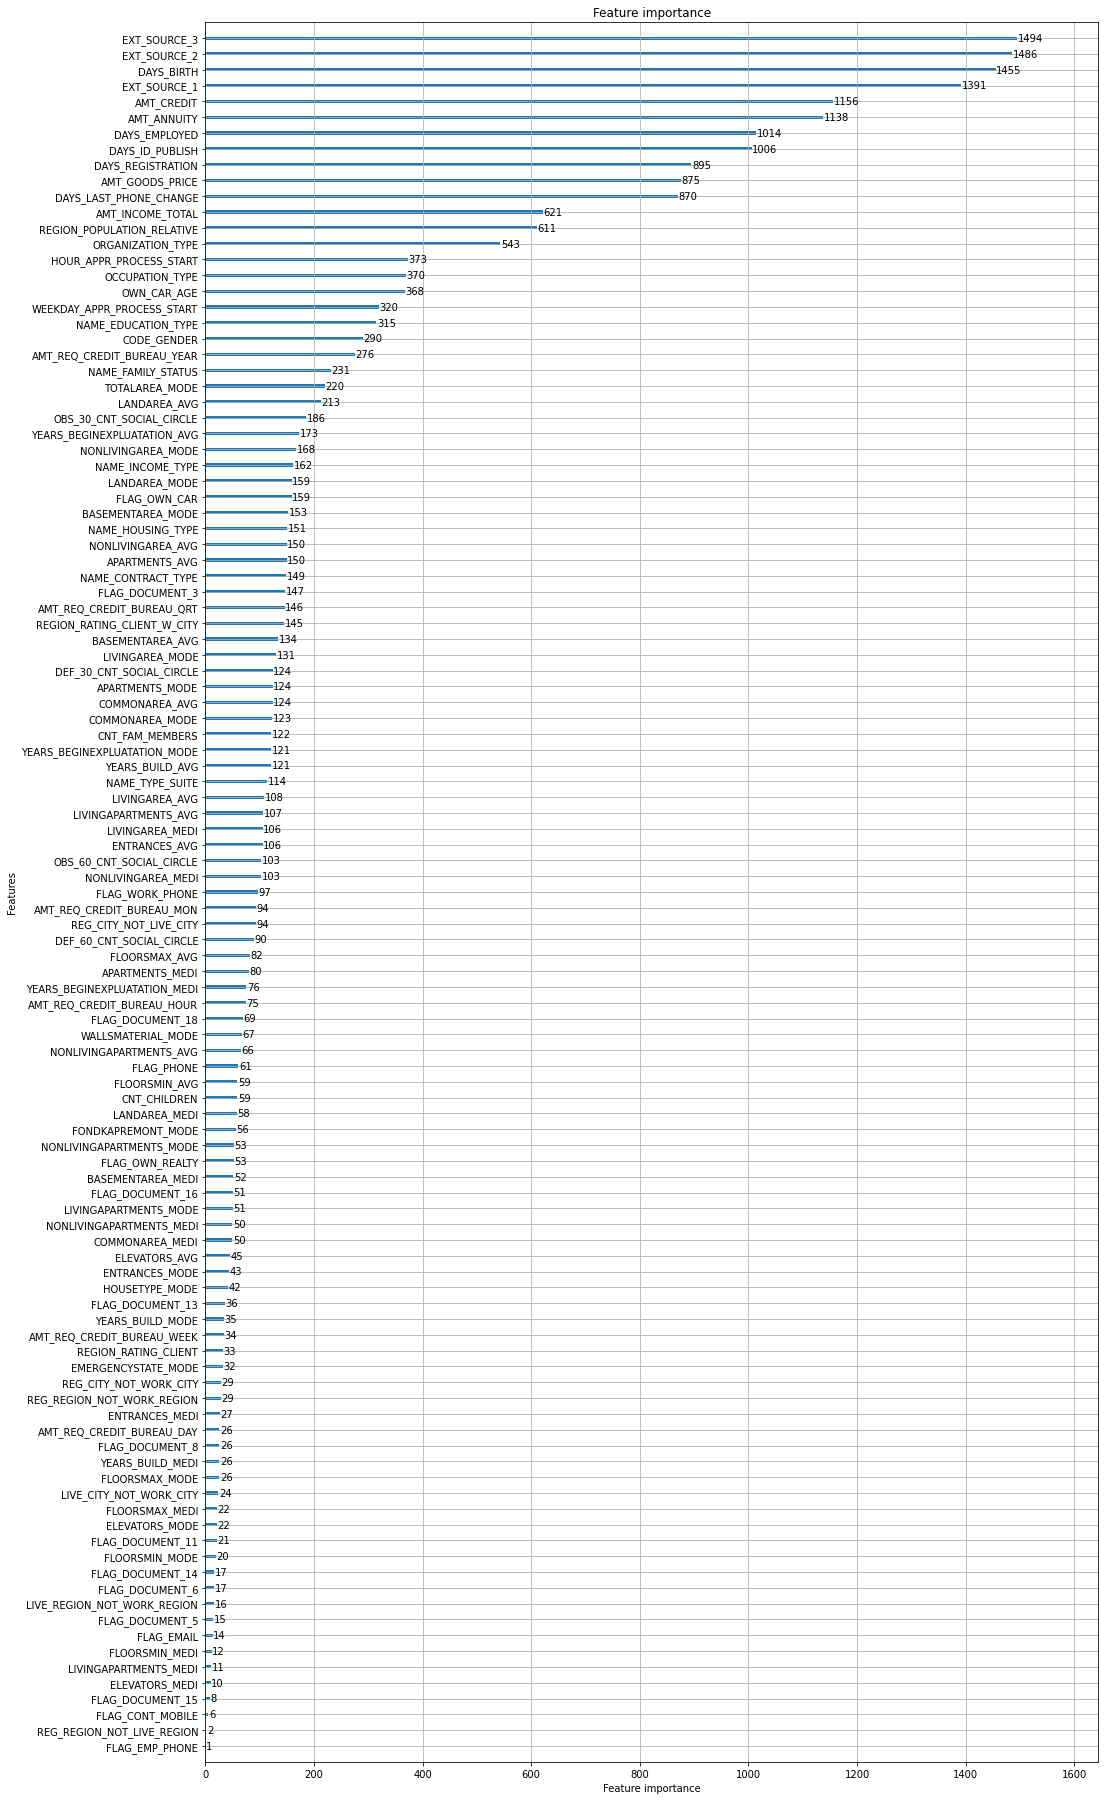

In [50]:
from lightgbm import plot_importance

plot_importance(clf,figsize=(16,32))

#### 연속형 숫자 feature들에 대해서 TARGET값에 따른 Historam시각화

In [51]:
app_train=pd.read_csv("/content/drive/MyDrive/application_train.csv")
app_test=pd.read_csv("/content/drive/MyDrive/application_test.csv")

In [53]:
num_columns=app_train.dtypes[app_train.dtypes!='object']
print(num_columns)

SK_ID_CURR                      int64
TARGET                          int64
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 106, dtype: object


In [64]:
def show_hist_by_target(df,columns):
  cond1=(df['TARGET']==1)
  cond0=(df['TARGET']==0)

  for column in columns:
    fig,axs=plt.subplots(figsize=(12,4),nrows=1,ncols=2,squeeze=False)
    sns.violinplot(x='TARGET',y=column,data=df,ax=axs[0][0])
    sns.distplot(df[cond0][column],ax=axs[0][1],label='0',color='blue')
    sns.distplot(df[cond1][column],ax=axs[0][1],label='1',color='red')


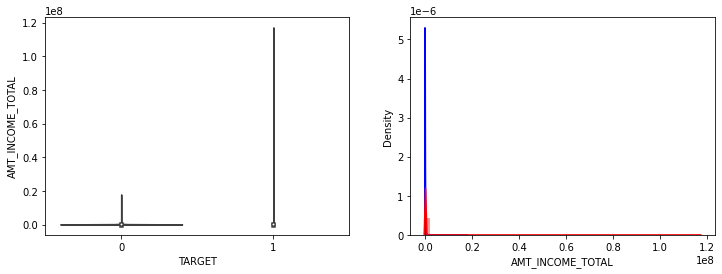

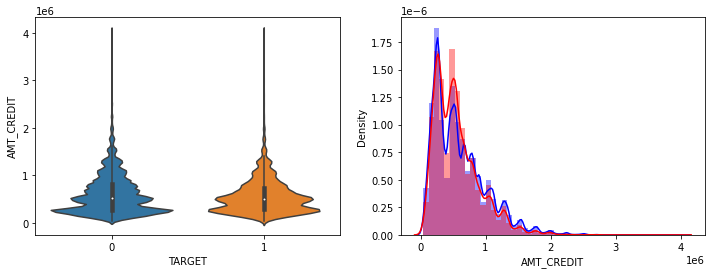

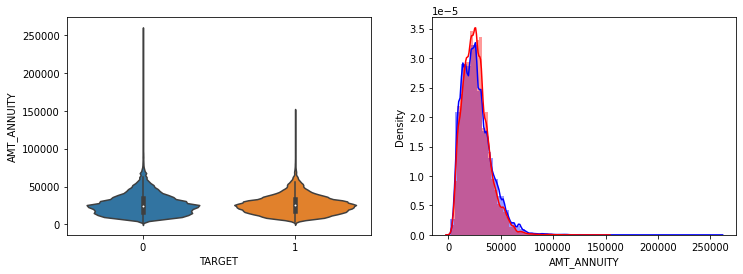

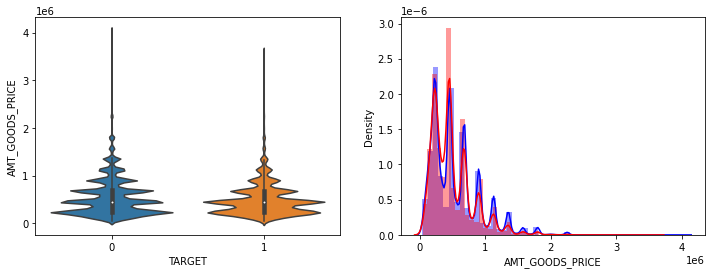

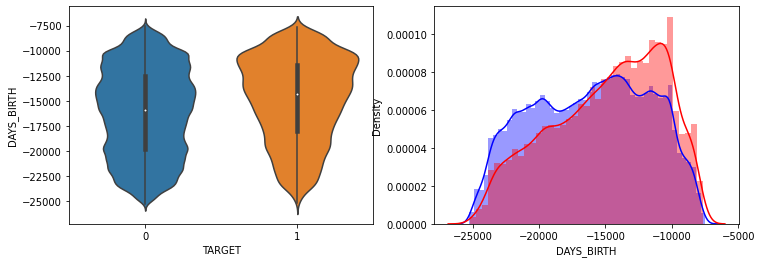

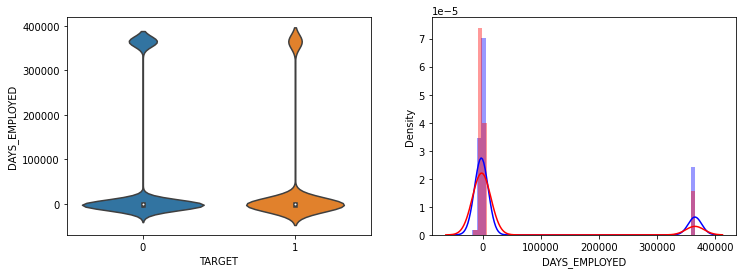

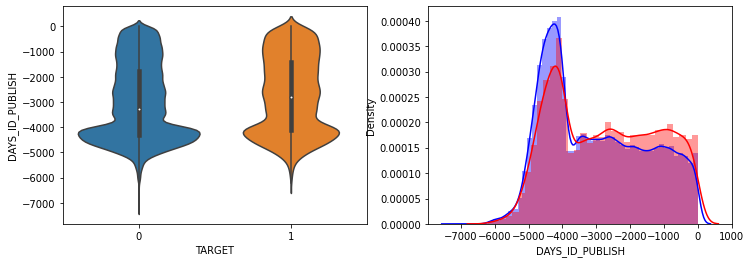

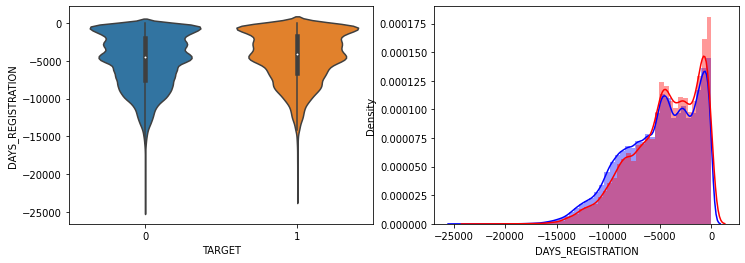

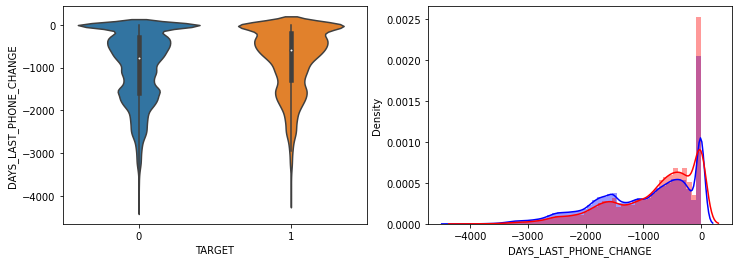

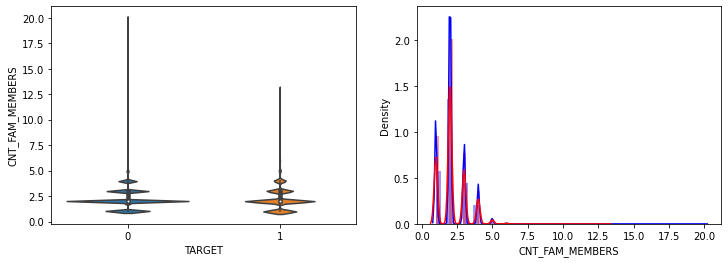

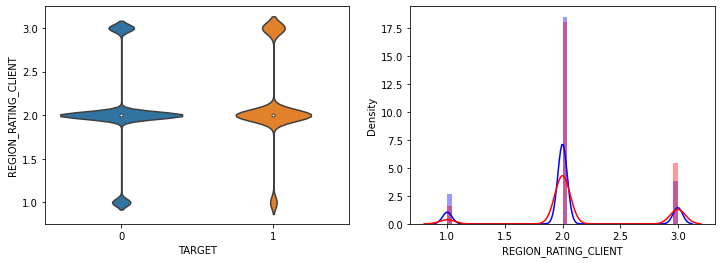

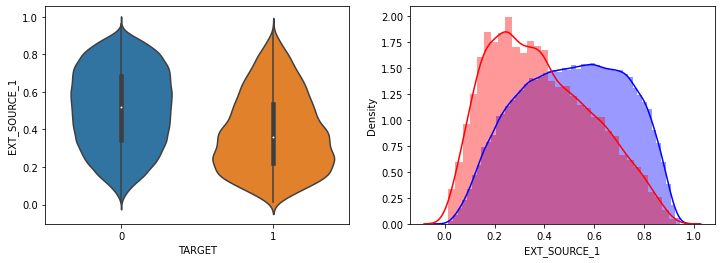

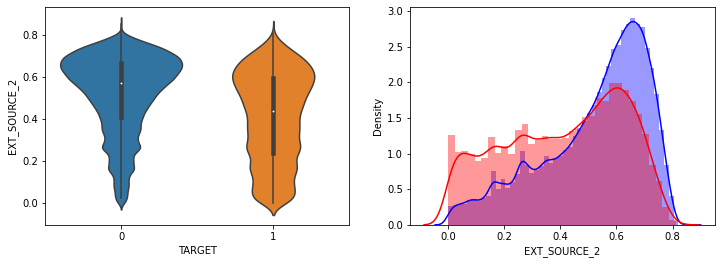

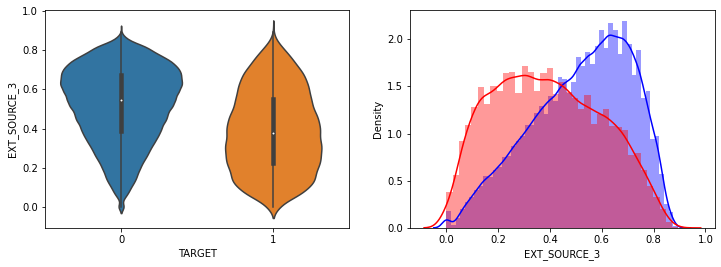

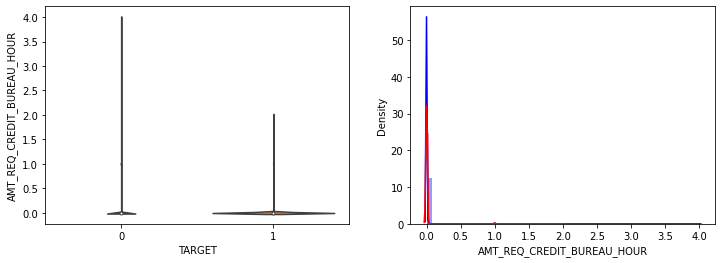

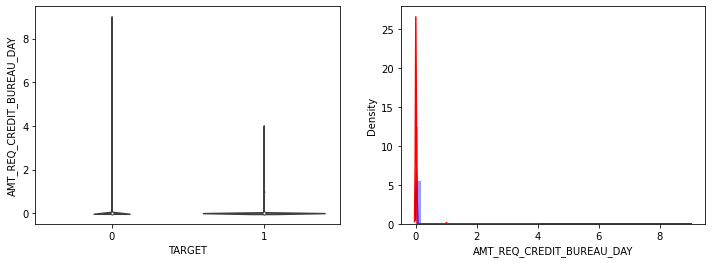

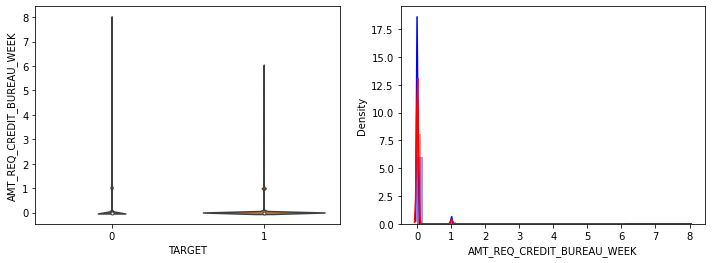

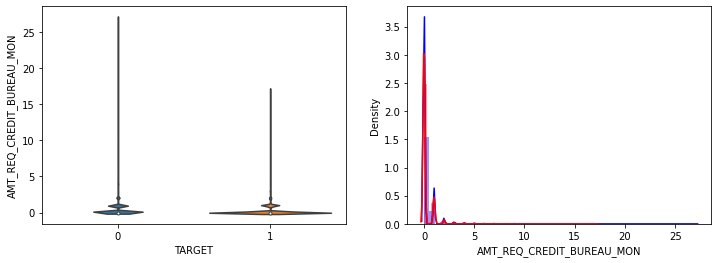

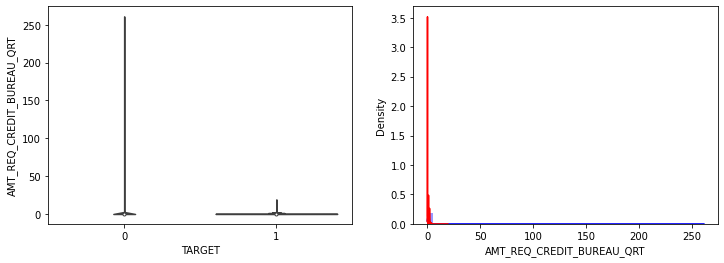

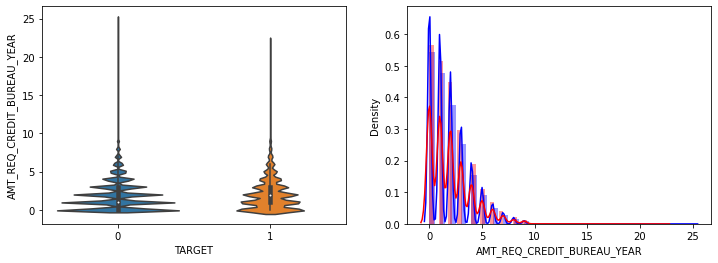

In [65]:
import warnings
warnings.filterwarnings('ignore')
columns=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
           'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'EXT_SOURCE_1', 
           'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
           'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

show_hist_by_target(app_train,columns)

* AMT_INCOME_TOTAL,AMT_CREDIT은 크게 차이가 없음
* AMT_ANNUITY는 TARGEY=1일때 상대적으로 작은 숫자대의 값이 조금 많음
* AMT_GOODS_PRICE는크게 차이가 없음
* DAYS_BIRTH는 TARGET=1일 때 적은 나이의 값이 많음
* DAYS_EMPLOYED는 TARGET=1일때 적은 값들이 많음
* DAYS_ID_PUBLISH와 DAYS_REGISTATION은 TARGET=1일때 최근 값들이 조금 더 많음
* DAYS_LAST_PHONE_CHANGE와 CNT_FAM_MEMBERS,CNT_FAM_MEMBERS는 큰 차이 없음.
* EXT_SOURCE_1,EXT_SOURCE_2, EXT_SOURCE_3 모두 조금씩 차이가 있음.
* 나머지 값들은 모두 큰 차이가 없음
* 전반적으로 연령대가 낮은(직장 경력이 낮은), 소액 대출에서 상대적으로 연체 비중이 높다


#### category feature들의 TARGET값에 따른 Count 비교

In [66]:
object_columns=app_train.dtypes[app_train.dtypes=='object'].index.tolist()
object_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

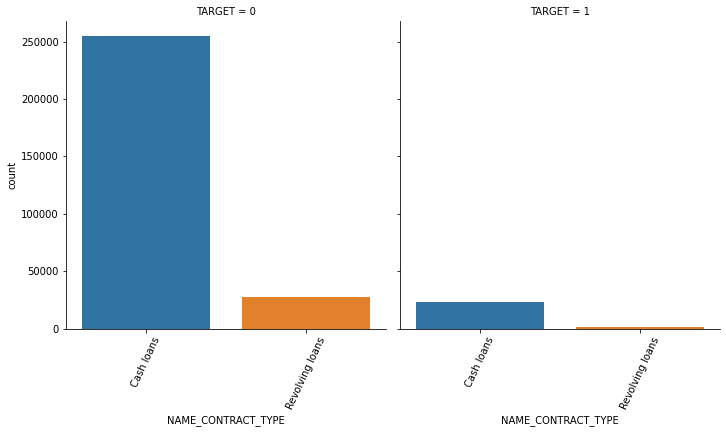

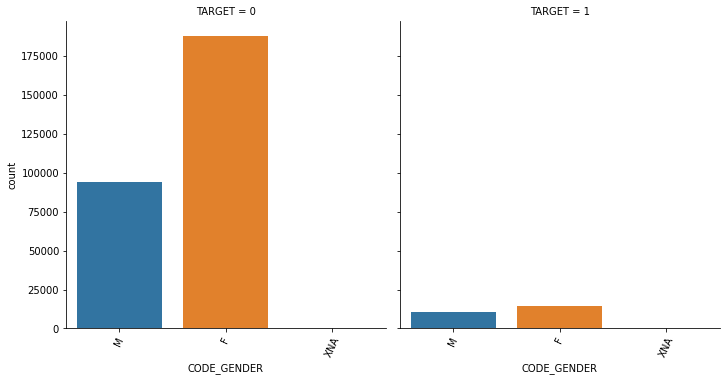

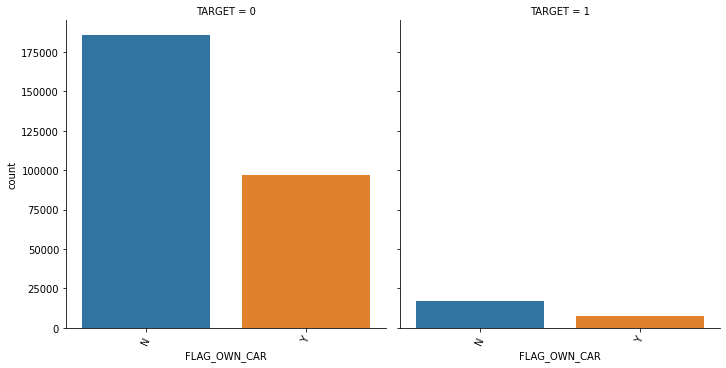

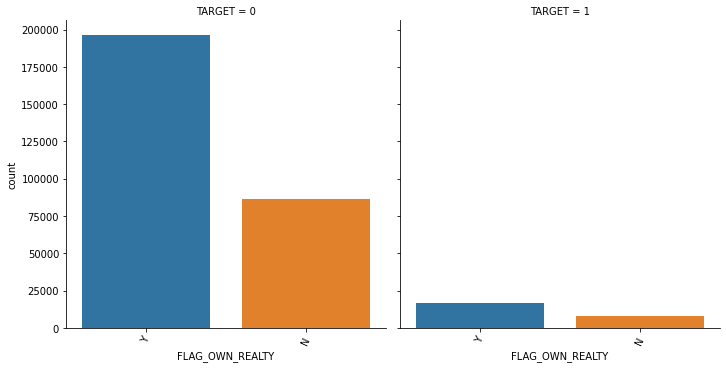

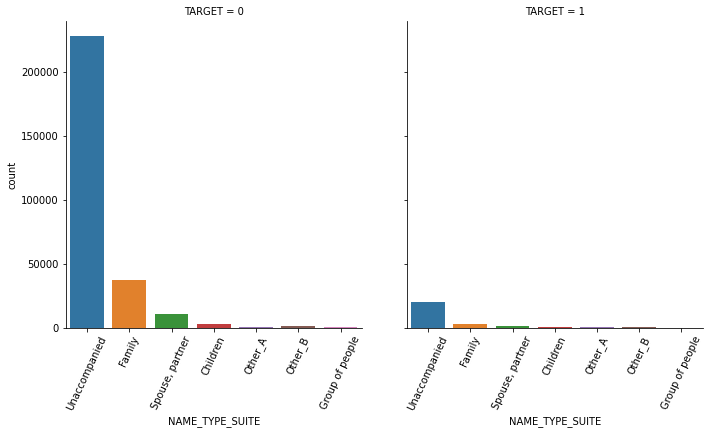

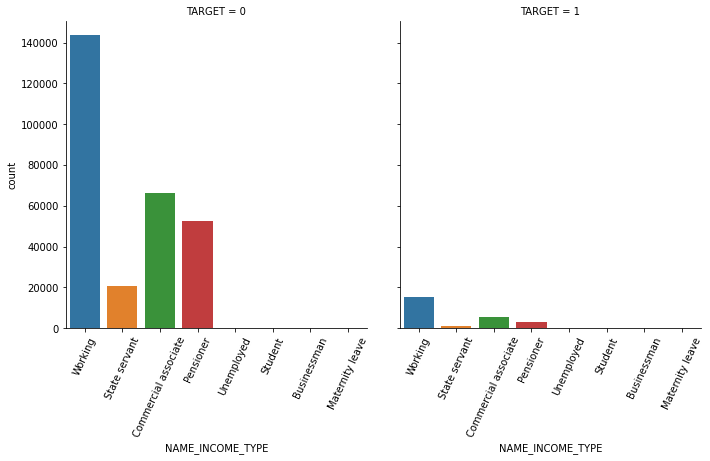

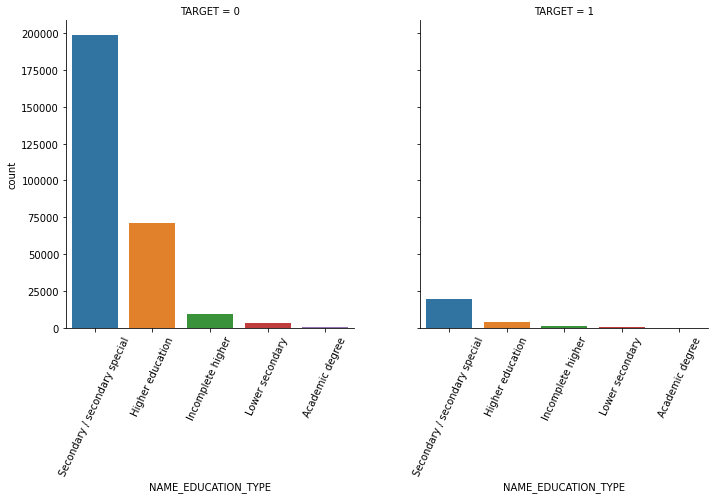

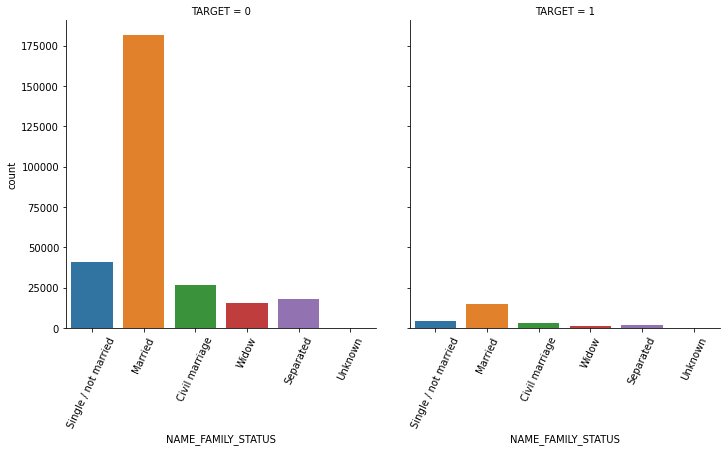

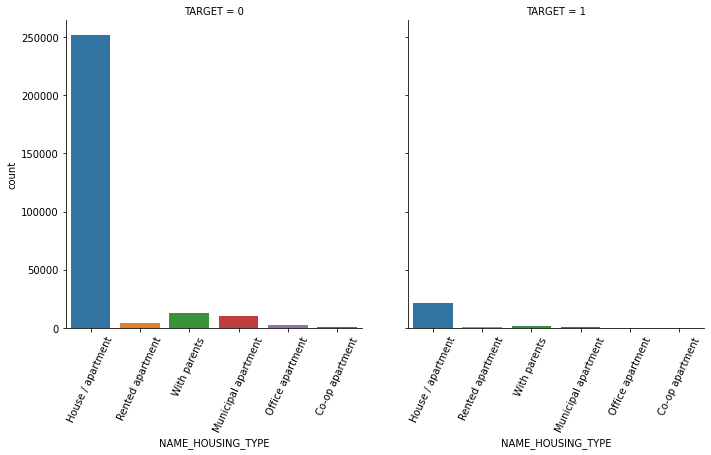

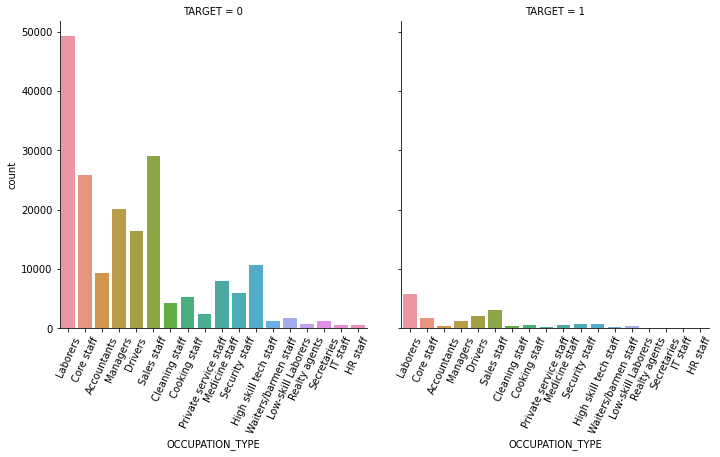

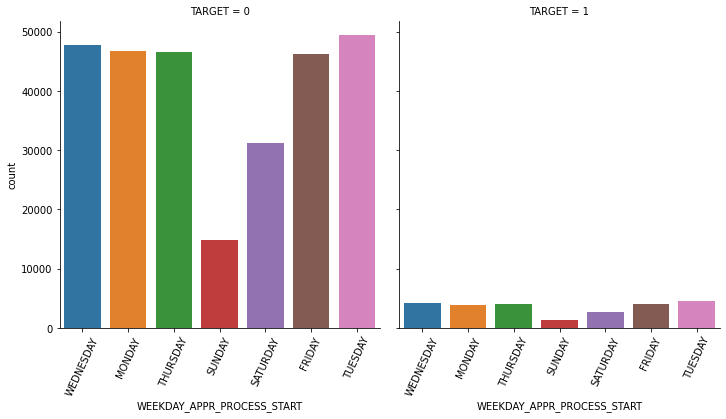

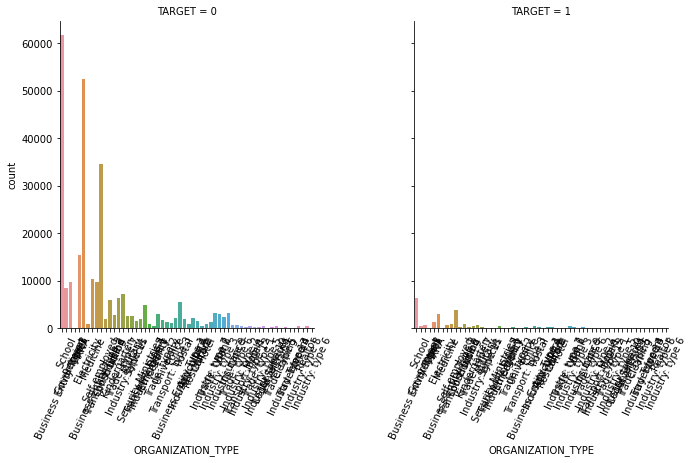

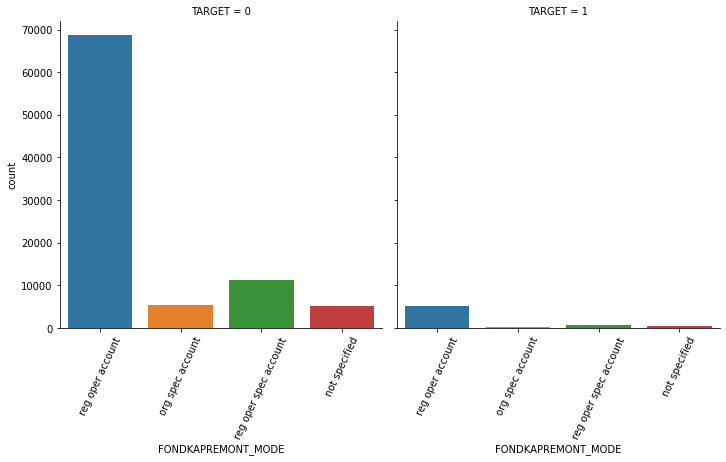

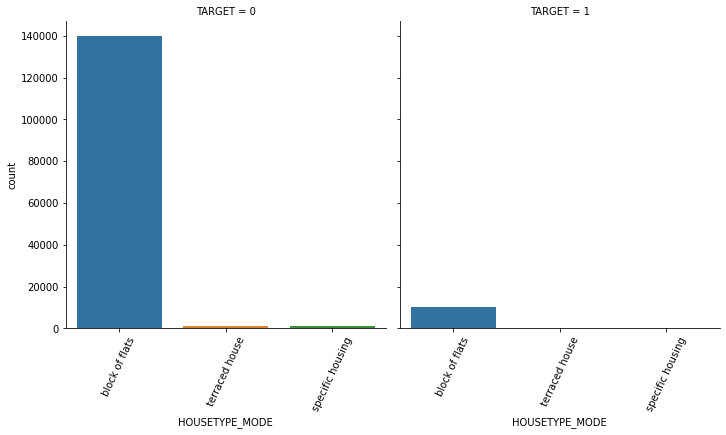

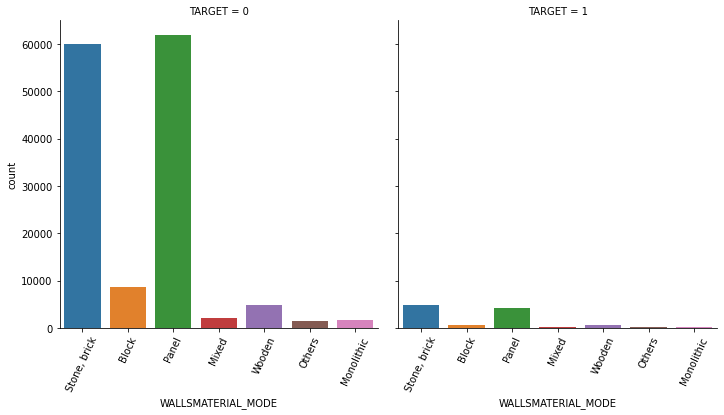

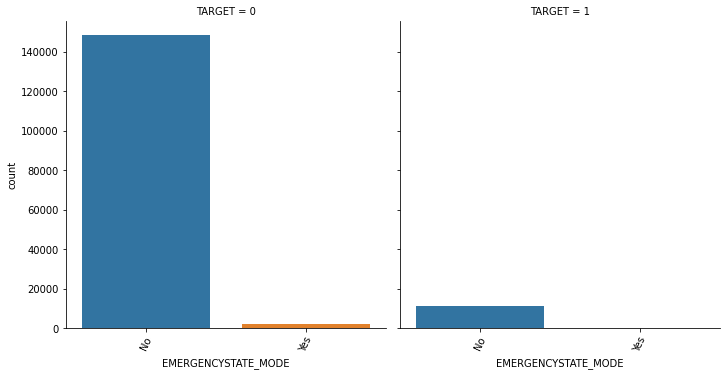

In [68]:
def show_category_by_target(df,columns):
  for column in columns:
    chart=sns.catplot(x=column,col='TARGET',data=df,kind='count')
    chart.set_xticklabels(rotation=65)

show_category_by_target(app_train,object_columns)

#### 대출 횟수 대비 연체 비율이 남성이 여성보다 높음. 이를 value_counts()로 확인

In [72]:
cond1=(app_train['TARGET']==1)
cond0=(app_train['TARGET']==0)
condf=(app_train['CODE_GENDER']=='F')
condm=(app_train['CODE_GENDER']=='M')

#전체 건수 대비 남성과 여성의 비율 확인
print(app_train['CODE_GENDER'].value_counts()/app_train.shape[0])
#TARGET=1 일 경우 남성과 여성의 비율 확인
print(app_train[cond1]['CODE_GENDER'].value_counts()/app_train[cond1].shape[0])
#TARGET=0 일 경우 남성과 여성의 비율 확인
print(app_train[cond0]['CODE_GENDER'].value_counts()/app_train[cond0].shape[0])

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64
F    0.570796
M    0.429204
Name: CODE_GENDER, dtype: float64
F      0.666032
M      0.333954
XNA    0.000014
Name: CODE_GENDER, dtype: float64


#### 주요 칼럼들과 taeget과의 상관도 분석

In [73]:
corr_columns = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
               'DAYS_EMPLOYED','DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL', 'TARGET']
corr=app_train[corr_columns].corr()

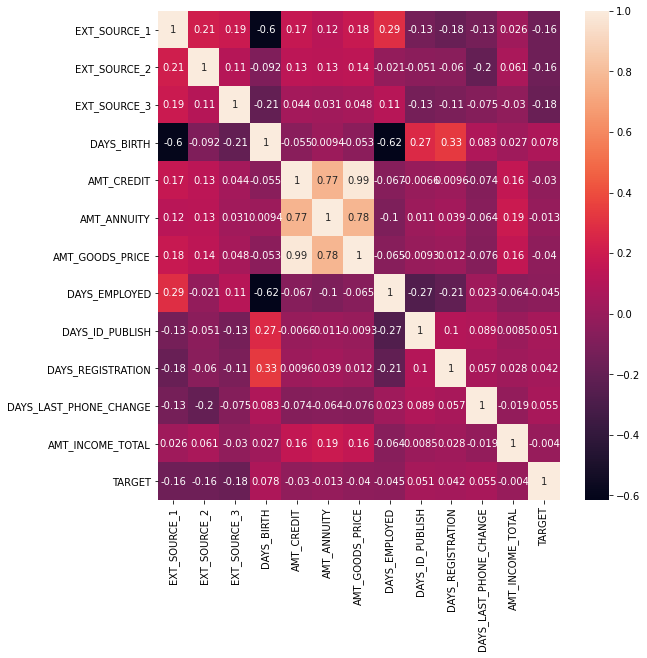

In [74]:
plt.figure(figsize=(9,9))
sns.heatmap(corr,annot=True)

#### 이상치 데이터 확인 및 DAYS_EMPLOYED 이상치 값 변경

In [75]:
app_train['DAYS_EMPLOYED'].value_counts()

 365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-11115         1
-11371         1
-11883         1
-13536         1
-8795          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [76]:
#CODE_GENDER의 결루 XNA가 4건 정도. 많지 않으므로 그대로 유지
app_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [78]:
app_train['DAYS_EMPLOYED']=app_train['DAYS_EMPLOYED'].replace(365243,np.nan)
app_train['DAYS_EMPLOYED'].value_counts(dropna=False)

 NaN        55374
-200.0        156
-224.0        152
-199.0        151
-230.0        151
            ...  
-8868.0         1
-13006.0        1
-10261.0        1
-14079.0        1
-9062.0         1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

### EXT_SOURCE 계열값 확인, EXT_SOURCE 피처들의 평균/최대/최소/표준편차 확인

In [79]:
app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].isnull().sum()

EXT_SOURCE_1    173378
EXT_SOURCE_2       660
EXT_SOURCE_3     60965
dtype: int64

In [80]:
app_train['EXT_SOURCE_1'].value_counts(dropna=False)

NaN         173378
0.546426         5
0.598469         5
0.499002         5
0.605152         5
             ...  
0.381263         1
0.259241         1
0.116346         1
0.171978         1
0.844540         1
Name: EXT_SOURCE_1, Length: 114585, dtype: int64

In [81]:
app_train['EXT_SOURCE_2'].value_counts(dropna=False)

0.285898    721
NaN         660
0.262258    417
0.265256    343
0.159679    322
           ... 
0.383020      1
0.786006      1
0.256132      1
0.297243      1
0.336367      1
Name: EXT_SOURCE_2, Length: 119832, dtype: int64

In [82]:
app_train['EXT_SOURCE_3'].value_counts(dropna=False)

NaN         60965
0.746300     1460
0.713631     1315
0.694093     1276
0.670652     1191
            ...  
0.887664        1
0.879506        1
0.020311        1
0.849170        1
0.014556        1
Name: EXT_SOURCE_3, Length: 815, dtype: int64

In [83]:
# EXT_SOURCE_X 피처들의 평균/최대/최소/표준편차 확인 
print('### mean ###\n', app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean())
print('### max ###\n',app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].max())
print('### min ###\n',app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].min())
print('### std ###\n',app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std())

### mean ###
 EXT_SOURCE_1    0.502130
EXT_SOURCE_2    0.514393
EXT_SOURCE_3    0.510853
dtype: float64
### max ###
 EXT_SOURCE_1    0.962693
EXT_SOURCE_2    0.855000
EXT_SOURCE_3    0.896010
dtype: float64
### min ###
 EXT_SOURCE_1    1.456813e-02
EXT_SOURCE_2    8.173617e-08
EXT_SOURCE_3    5.272652e-04
dtype: float64
### std ###
 EXT_SOURCE_1    0.211062
EXT_SOURCE_2    0.191060
EXT_SOURCE_3    0.194844
dtype: float64


#### 데이터 가공 전 학습과 테스트용 데이터 세트 결합

In [84]:
apps=pd.concat([app_train,app_test])
apps.shape

(356255, 122)

#### EXT_SOURCE_X FEATURE 가공

*   EXT_SOURCE_X 피처들을 결합하여 평균과 표준 편차를 신규 생성



In [85]:
apps['APPS_EXT_SOURCE_MEAN']=apps[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].mean(axis=1)
apps['APPS_EXT_SOURCE_STD']=apps[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].std(axis=1)

In [86]:
apps['APPS_EXT_SOURCE_STD'].isnull().sum()

40950

In [88]:
#새로 생성한 APPS_SOURCE_STD이 NULL일 경우 APPS_EXT_SOURCE_STD의 평균으로 일괄 변경
apps['APPS_EXT_SOURCE_STD']=apps['APPS_EXT_SOURCE_STD'].fillna(apps['APPS_EXT_SOURCE_STD'].mean())
apps['APPS_EXT_SOURCE_STD'].isnull().sum()

0

#### AMT_INCOME_TOTAL 비율로 Feature 가공

In [90]:
# AMT_INCOME_TOTAL 비율로 대출 금액 관련 피처 가공
apps['APPS_ANNUITY_INCOME_RATIO'] = apps['AMT_ANNUITY']/apps['AMT_INCOME_TOTAL']
apps['APPS_CREDIT_INCOME_RATIO'] = apps['AMT_CREDIT']/apps['AMT_INCOME_TOTAL']
apps['APPS_GOODS_INCOME_RATIO'] = apps['AMT_GOODS_PRICE']/apps['AMT_INCOME_TOTAL']
# 가족수를 고려한 가처분 소득 피처 가공. 
apps['APPS_CNT_FAM_INCOME_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['CNT_FAM_MEMBERS']

#### DAYS_BIRTH, DAYS_EMPLOYED 비율로 Feature 가공.



In [89]:
apps['APPS_EMPLOYED_BIRTH_RATIO'] = apps['DAYS_EMPLOYED']/apps['DAYS_BIRTH']
apps['APPS_INCOME_EMPLOYED_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_EMPLOYED']
apps['APPS_INCOME_BIRTH_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_BIRTH']
apps['APPS_CAR_BIRTH_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_BIRTH']
apps['APPS_CAR_EMPLOYED_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_EMPLOYED']

#### 데이터 레이블 인코딩, Null 값은 LightGBM 내부에서 처리하도록 특별한 변경하지 않음

In [91]:
for column in object_columns:
  apps[column]=pd.factorize(apps[column])[0]

In [92]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 133 entries, SK_ID_CURR to APPS_CNT_FAM_INCOME_RATIO
dtypes: float64(78), int64(55)
memory usage: 364.2 MB


#### 학습 데이터와 테스트 데이터 다시 분리

In [102]:
apps_train=apps[~apps['TARGET'].isnull()]
apps_test=apps[apps['TARGET'].isnull()]

apps_test=apps_test.drop('TARGET',axis=1)

#### LGBM Classifier로 학습 수행



In [104]:
ftr_app=apps_train.drop(['SK_ID_CURR','TARGET'],axis=1)
target_app=apps_train['TARGET']

train_x,valid_x,train_y,valid_y=train_test_split(ftr_app,target_app,test_size=0.3,random_state=0)
train_x.shape,valid_x.shape

((215257, 131), (92254, 131))

In [105]:
clf = LGBMClassifier(
        n_jobs=-1,
        n_estimators=1000,
        learning_rate=0.02,
        num_leaves=32,
        subsample=0.8,
        max_depth=12,
        silent=-1,
        verbose=-1
        )

clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], eval_metric= 'auc', verbose= 100, 
        early_stopping_rounds= 100)


Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.75649	training's binary_logloss: 0.249197	valid_1's auc: 0.744707	valid_1's binary_logloss: 0.248902
[200]	training's auc: 0.775498	training's binary_logloss: 0.242653	valid_1's auc: 0.754012	valid_1's binary_logloss: 0.24536
[300]	training's auc: 0.789389	training's binary_logloss: 0.238335	valid_1's auc: 0.757756	valid_1's binary_logloss: 0.244179
[400]	training's auc: 0.801443	training's binary_logloss: 0.234759	valid_1's auc: 0.758772	valid_1's binary_logloss: 0.24383
[500]	training's auc: 0.811597	training's binary_logloss: 0.231709	valid_1's auc: 0.759378	valid_1's binary_logloss: 0.243662
[600]	training's auc: 0.820712	training's binary_logloss: 0.22883	valid_1's auc: 0.759591	valid_1's binary_logloss: 0.24357
[700]	training's auc: 0.829163	training's binary_logloss: 0.226044	valid_1's auc: 0.759784	valid_1's binary_logloss: 0.243486
[800]	training's auc: 0.837482	training's binary_logloss: 0.

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.02, max_depth=12,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=32, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=-1,
               subsample=0.8, subsample_for_bin=200000, subsample_freq=0,
               verbose=-1)

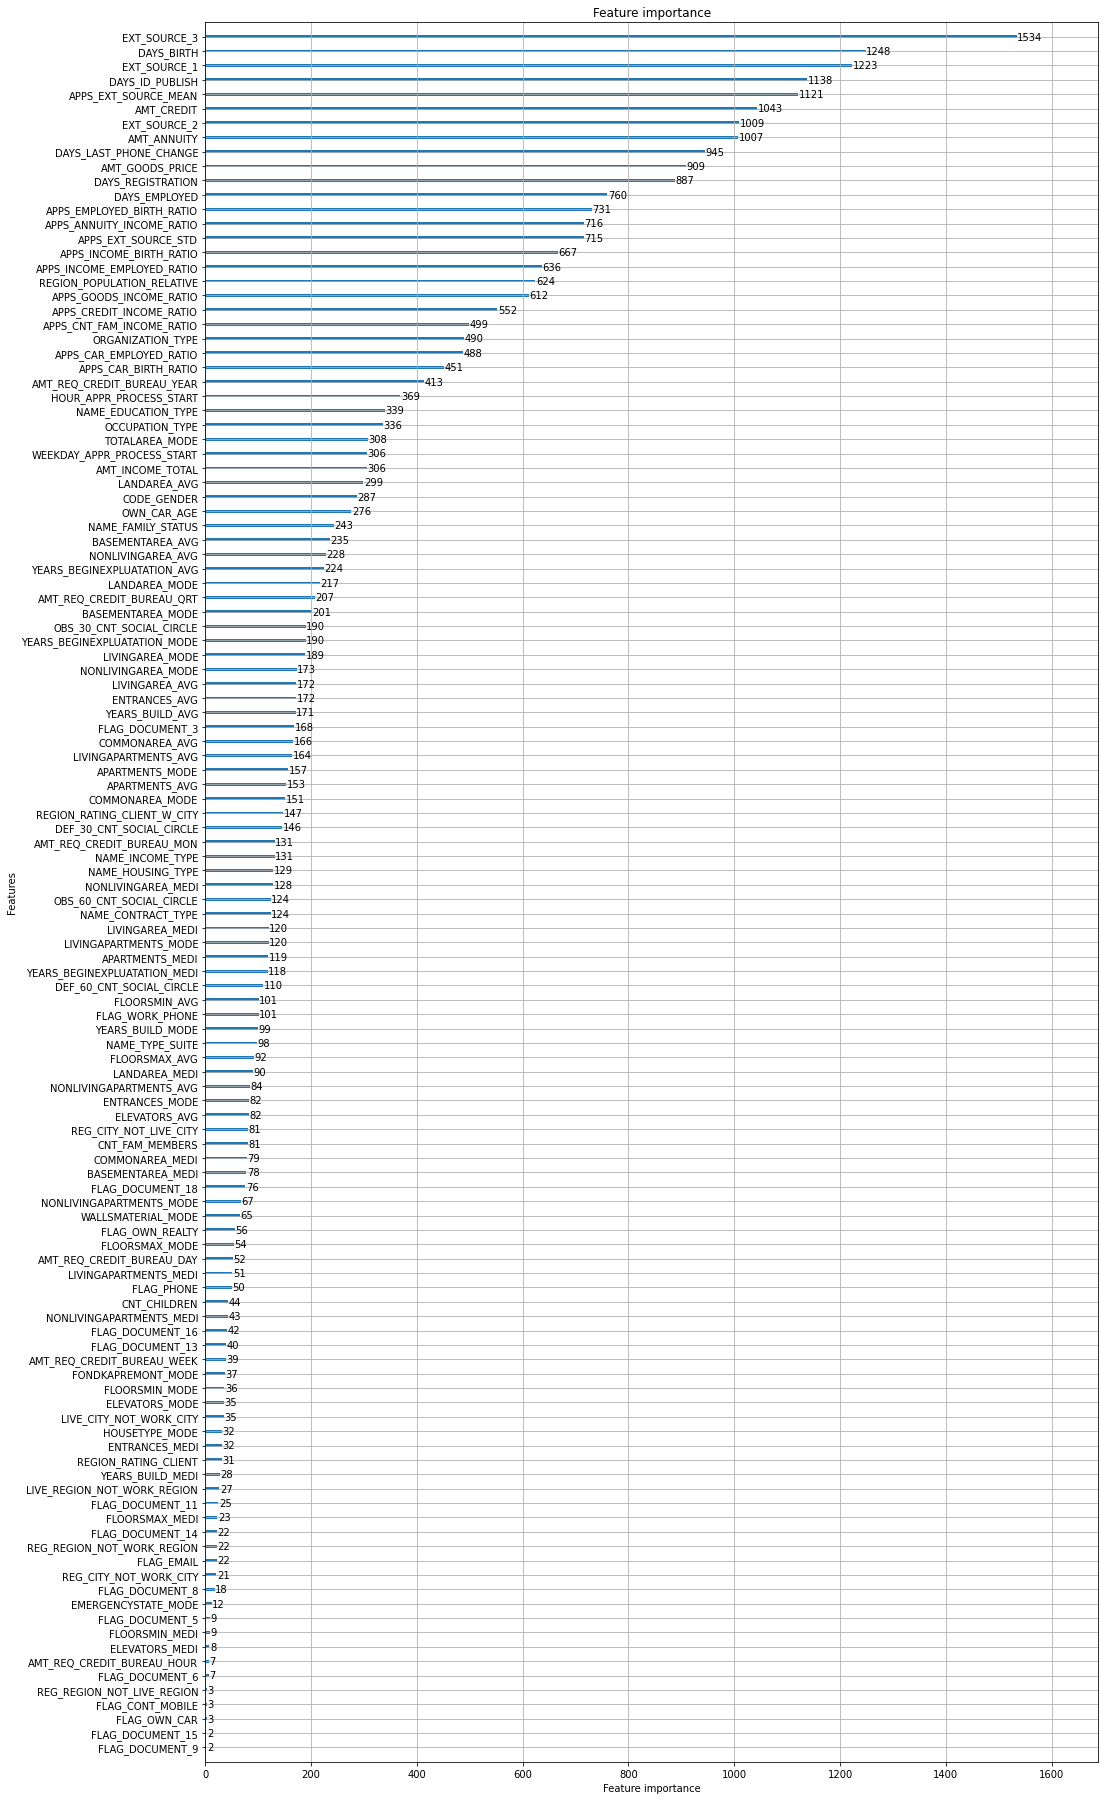

In [106]:
from lightgbm import plot_importance

plot_importance(clf, figsize=(16, 32))